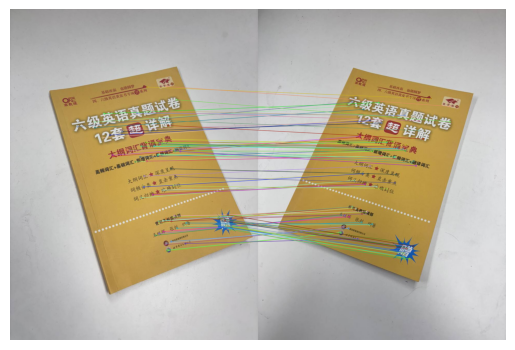

In [101]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_matches(image1, image2):
    # 创建SIFT检测器对象
    sift = cv2.SIFT_create()

    # 在图像中检测特征点和计算特征描述符
    keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

    # 使用FLANN匹配器进行特征点匹配
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    # 保留良好的匹配点
    good_matches = []
    for m, n in matches:
        if m.distance < 0.35 * n.distance:
            good_matches.append(m)

    # 提取匹配点的坐标
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    return src_pts, dst_pts, keypoints1, keypoints2, good_matches

if __name__ == '__main__':
    # 读取图片
    image1 = cv2.imread('data/image111.jpg')
    image2 = cv2.imread('data/image222.jpg')

    # 提取特征点并进行匹配
    src_pts, dst_pts, keypoints1, keypoints2, good_matches = find_matches(image1, image2)

    # 绘制匹配的特征点
    matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # 转换为RGB格式
    matched_image_rgb = cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB)

    # 使用Matplotlib显示结果
    plt.imshow(matched_image_rgb)
    plt.axis('off')
    plt.show()


In [111]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_matches(image1, image2):
    # 创建SIFT检测器对象
    sift = cv2.SIFT_create()

    # 在图像中检测特征点和计算特征描述符
    keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

    # 使用FLANN匹配器进行特征点匹配
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    # 保留良好的匹配点
    good_matches = []
    for m, n in matches:
        if m.distance < 0.35 * n.distance:
            good_matches.append(m)

    # 提取匹配点的坐标
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    return src_pts, dst_pts, keypoints1, keypoints2, good_matches

Homography Matrix:
[[ 4.90881127e-01 -5.07578386e-01  4.50759311e+02]
 [ 2.09852692e-01  7.00193933e-01 -3.25050739e+01]
 [-3.71797338e-04  9.94447002e-05  1.00000000e+00]]


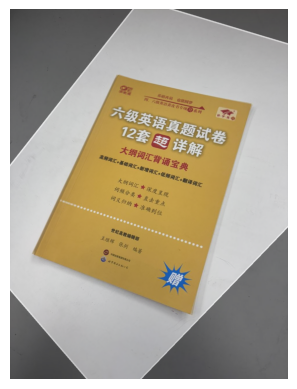

In [112]:
if __name__ == '__main__':
    # 读取图片
    image1 = cv2.imread('data/image111.jpg')
    image2 = cv2.imread('data/image222.jpg')

    # 提取特征点并进行匹配
    src_pts, dst_pts, keypoints1, keypoints2, good_matches = find_matches(image1, image2)
   
    # 计算单应性变换矩阵
    H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # 应用单应性变换
    height, width, _ = image2.shape
    warped_image = cv2.warpPerspective(image1, H, (width, height))

    # 绘制单应性变换矩阵边界框
    corners = np.float32([[0, 0], [0, height - 1], [width - 1, height - 1], [width - 1, 0]]).reshape(-1, 1, 2)
    transformed_corners = cv2.perspectiveTransform(corners, H)
    warped_image = cv2.polylines(warped_image, [np.int32(transformed_corners)], True, (255, 255, 255), 3)

    # 合并两张图像
    merged_image = cv2.addWeighted(warped_image, 0.5, image2, 0.5, 0)

    # 打印单应性变换矩阵
    print("Homography Matrix:")
    print(H)
    
    # 显示结果
    plt.imshow(cv2.cvtColor(merged_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


In [113]:
# 计算重投影误差
points1_transformed = cv2.perspectiveTransform(src_pts, H)
reprojection_errors = np.sqrt(np.sum((dst_pts - points1_transformed)**2, axis=2))

# 计算平均重投影误差
mean_reprojection_error = np.mean(reprojection_errors)

print("平均重投影误差:", mean_reprojection_error)

平均重投影误差: 2.4011803
